<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_7_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%90%D0%BA%D0%B8%D0%BC%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# from scipy import stats
# from sklearn import linear_model
# from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import ComplementNB
# from sklearn import tree
# from sklearn import ensemble
# from sklearn import metrics
# from sklearn import cluster
# from sklearn import feature_selection

import warnings
warnings.filterwarnings("ignore")

# from sys import getsizeof
# import pickle

# from google.colab import drive
# drive.mount('/content/drive')

path = "https://raw.githubusercontent.com/akitim/datasets/main/spam_or_not_spam.zip"
data = pd.read_csv(path)
data.sample(5)


,email,label
1952,url eNUMBERcNUMBERcaNUMBERfcNUMBERaNUMBEReNUMB...,0
2826,事業者 氏名 vip mail 突然のメール失礼いたします 今後この広告がご不要な方はその...,1
1509,jm URL justin mason writes yes NUMBER of the e...,0
2796,copy dvd movies yes copy and burn your own dv...,1
2438,i found this interesting but not very original...,0


In [3]:
# частоты классов, 1 - спам, 0 - не спам
class_num = data['label'].value_counts()
print(f"В датасете писем:\n\tcо спамом: {class_num[1]}" +\
      f"\n\tбез спама: {class_num[0]}\n")
class_freq = class_num / data['label'].size
# labels = class_freq.index.to_list()
class_freq

В датасете писем:
	cо спамом: 500
	без спама: 2500



0    0.833333
1    0.166667
Name: label, dtype: float64

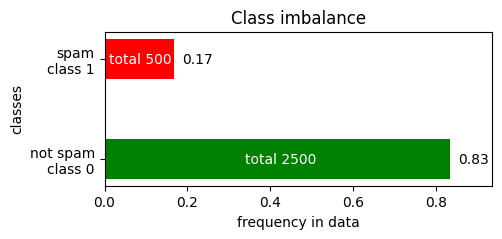

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.barh(y=['not spam\nclass 0', 'spam\nclass 1'], width=class_freq,
        height=0.4, color=['g', 'r']);
ax.set_ylabel('classes');
ax.set_xlabel('frequency in data');
ax.set_title('Class imbalance');
ax.text(class_freq[0] / 2 - 0.078, -0.05, f'total {class_num[0]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[0] + 0.02, -0.05, f'{np.round(class_freq[0], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.text(class_freq[1] / 2 - 0.072, 0.95, f'total {class_num[1]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[1] + 0.02, 0.95, f'{np.round(class_freq[1], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.set_xbound(ax.get_xbound()[0], ax.get_xbound()[1] + 0.06)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [6]:
data_clean = data.copy()
data_clean["email"] = data_clean["email"].str.replace('\W+', ' ').\
    str.replace('\s+', ' ').str.strip().str.lower()
data_clean["email"][data_clean["email"] == ''] = np.NaN
data_clean.dropna(inplace=True)


# 2806
# 2828
# 2966
# data_clean.loc[[2806, 2828, 2966], 'email']


Переводим данные в векторный вид:

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
print("Признаков в наборе данных:", X.shape[1])

Признаков в наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [9]:
X = X.todense()
y = data_clean['label'].values


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
) #[1].shape
X_train, X_test, y_train, y_test =  np.asarray(X_train), np.asarray(X_test),\
     np.asarray(y_train), np.asarray(y_test)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [11]:
np.round(y_test.mean(), 3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [12]:
# from sklearn.naive_bayes import ComplementNB
NB_compl = ComplementNB(alpha=0.01)
NB_compl.fit(np.asarray(X_train), y_train);


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [50]:
def ROC_curve(y_true, y_proba, n_points=21):
    N_pos = np.sum(y_true)
    N_neg = -np.sum(y_true - 1) #y_true.size - N_pos
    # thresholds = np.insert(np.linspace(1, 0, n_points - 1), 0, 2)
    thresholds = np.array([2.0, 1.00000000e+000, 3.95582034e-001, 1.97777725e-001,
        2.50304524e-002, 7.13896259e-003, 5.69060755e-003, 8.01737212e-004,
        5.87674160e-004, 2.94115091e-006, 1.71626708e-006, 4.97861450e-009,
        4.88105108e-009, 9.52112111e-011, 8.57231319e-011, 3.86618520e-052,
        2.56990706e-052, 2.17388884e-322, 0.00000000e+000])
    y_pred_thr = y_proba.copy()
    FPR = []
    TPR = []
    for threshold in thresholds:
        y_pred_thr = np.asarray([1 if y >= threshold else 0 for y in y_pred_thr])
        FPR += [np.sum(y_pred_thr[y_true == 0] == 1) / N_neg]
        TPR += [np.sum(y_pred_thr + y_true == 2) / N_pos]
    return FPR, TPR, thresholds

y_pred = NB_compl.predict(X_test)
y_proba = NB_compl.predict_proba(X_test)

TP = np.sum(y_pred + y_test == 2)
TN = np.sum(y_pred + y_test == 0)
FP = np.sum(y_pred[y_test == 0] == 1)
FN = np.sum(y_pred[y_test == 1] == 0)
# print(np.array([[TP, FP], [FN, TN]]))

# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# sensitivity = TP / (TP + FN)
# specificity = TN / (TN + FP)
# balanced_accuracy = (recall + specificity) / 2
# f1_score = 2 * precision * recall / precision + recall
metrics_df = pd.DataFrame(
    {'Precision': [TP / (TP + FP)], 'Recall(sensitivity)': [TP / (TP + FN)],
     'Specificity': [TN / (TN + FP)],
     'Balanced accuracy': [(TP / (TP + FN) + TN / (TN + FP) ) / 2],
     'F1-score': [2 * TP / (2 * TP + FP + FN)]
     }, index = ['metrics value']).T
metrics_df['metrics value'] = metrics_df['metrics value'].round(3)
metrics_df


,metrics value
Precision,1.000
Recall(sensitivity),0.927
Specificity,1.000
Balanced accuracy,0.964
F1-score,0.962


(array([0.        , 0.        , 0.        , 0.00159744, 0.00159744,
        0.00319489, 0.00319489, 0.00638978, 0.00638978, 0.02236422,
        0.02715655, 0.0543131 , 0.0543131 , 0.07827476, 0.07827476,
        0.46645367, 0.46645367, 0.97603834, 1.        ]),
 array([0.        , 0.86290323, 0.94354839, 0.94354839, 0.95967742,
        0.95967742, 0.96774194, 0.96774194, 0.97580645, 0.97580645,
        0.97580645, 0.97580645, 0.98387097, 0.98387097, 0.99193548,
        0.99193548, 1.        , 1.        , 1.        ]),
 array([2.00000000e+000, 1.00000000e+000, 3.95582034e-001, 1.97777725e-001,
        2.50304524e-002, 7.13896259e-003, 5.69060755e-003, 8.01737212e-004,
        5.87674160e-004, 2.94115091e-006, 1.71626708e-006, 4.97861450e-009,
        4.88105108e-009, 9.52112111e-011, 8.57231319e-011, 3.86618520e-052,
        2.56990706e-052, 2.17388884e-322, 0.00000000e+000]))

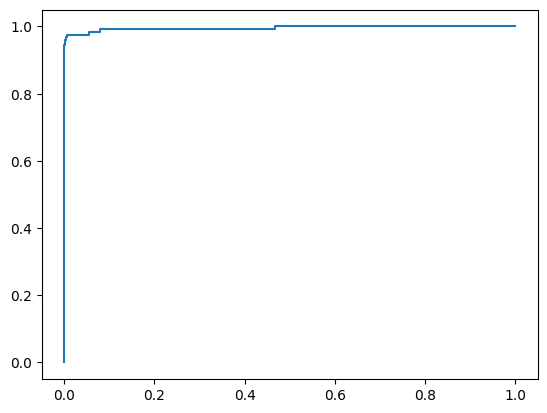

In [44]:
# delete
from sklearn.metrics import roc_curve
fpr, tpr, thrs = roc_curve(y_test, y_proba[:, 1], pos_label=1)
plt.plot(fpr, tpr)
fpr, tpr, thrs
# n_points = 11
# np.linspace(1, 0, n_points)

Нарисуйте ROC-кривую:

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0])

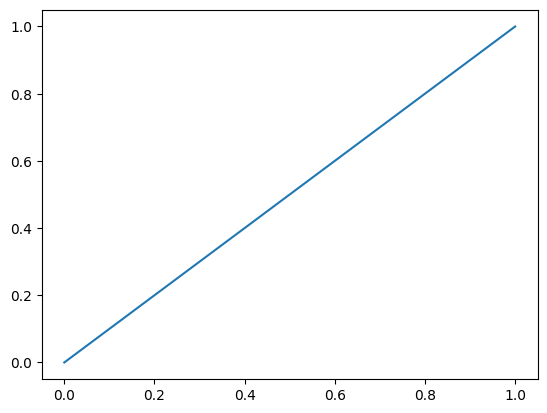

In [51]:
FPR, TPR, thrs = ROC_curve(y_test, y_proba[:, 1], n_points=20)
plt.plot(TPR, FPR)

FPR, TPR

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь